# Predicting Fraudulent Transactions

##### DATA-PRE-PROCESSING

In [1]:
import pandas as pd                                         #Import required python library.
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import pylab
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder             #Import required Machine learning library.
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import  RandomForestClassifier

In [3]:
df=pd.read_csv(r"C:\Users\sawad\122shashikant\Data Science course\INSAID Assignments\Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(6362620, 11)

In [7]:
df.info()                   #In this dataset there are float, integir and objetc data types are available

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 582.5+ MB


In [8]:
df.isna().sum()             # we saw there is no missing / null values in this data.

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

#### VISUALISATION

<AxesSubplot:xlabel='type', ylabel='count'>

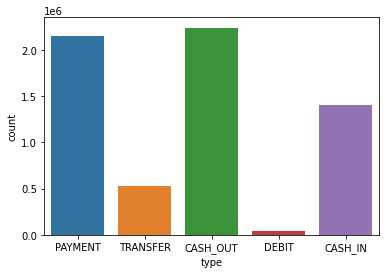

In [10]:
sns.countplot(df['type'])

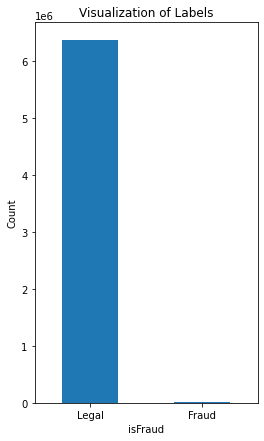

In [11]:
plt.figure(figsize=(4,7))
labels = ["Legal", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [12]:
fraud_count=df['isFraud'].value_counts()
fraud_count

0    6354407
1       8213
Name: isFraud, dtype: int64

([<matplotlib.patches.Wedge at 0x1a319917460>,
 [Text(-1.099990955625572, 0.004460666087110192, '0'),
  Text(1.0999909559371663, -0.004460589247970448, '1')],
 [Text(-0.5999950667048575, 0.002433090592969195, '99.87%'),
  Text(0.599995066874818, -0.002433048680711153, '0.13%')])

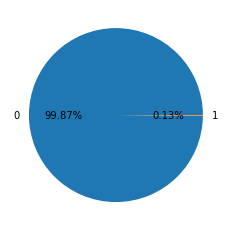

In [13]:
plt.pie(fraud_count,labels=fraud_count.keys(),autopct='%.2f%%')

As we saw only 0.13% of is fraud cases happened.

In [14]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [15]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [16]:
pd.set_option('display.float_format','{:.2f}'.format)

In [17]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [18]:
df.describe(include='object')

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C363736674,C1286084959
freq,2237500,3,113


### Collerelation Between Columns

In [19]:
df.corr()                   # we have to find out multi-collinearity. 

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.00,0.02,-0.01,-0.01,0.03,0.03,0.03,0.00
amount,0.02,1.00,-0.00,-0.01,0.29,0.46,0.08,0.01
oldbalanceOrg,-0.01,-0.00,1.00,1.00,0.07,0.04,0.01,0.00
newbalanceOrig,-0.01,-0.01,1.00,1.00,0.07,0.04,-0.01,0.00
oldbalanceDest,0.03,0.29,0.07,0.07,1.00,0.98,-0.01,-0.00
newbalanceDest,0.03,0.46,0.04,0.04,0.98,1.00,0.00,-0.00
isFraud,0.03,0.08,0.01,-0.01,-0.01,0.00,1.00,0.04
isFlaggedFraud,0.00,0.01,0.00,0.00,-0.00,-0.00,0.04,1.00


<AxesSubplot:>

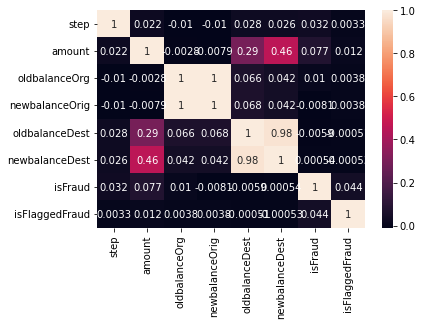

In [20]:
# plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

As we saw in the heatmap, there is a multy - collinearity between oldbalanceOrg and newbalanceOrig , 
oldbalanceDest and newbalanceDest

## Feature Engineering

#### LABEL-ENCODING

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder={}

for i in df.select_dtypes('object').columns:
    encoder[i]=LabelEncoder()
    df[i]=encoder[i].fit_transform(df[i])

In [22]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0


In [23]:
df.info()                                # we convert object data type to int32 data type.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 509.7 MB


### Data Split into X and Y

In [24]:
x=df.drop(columns=['isFraud'])
y=df['isFraud']

In [25]:
y.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

### Use SMOTE for handdle Unbalance data

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
over_sample = SMOTE(random_state=0)

In [28]:
x,y=over_sample.fit_resample(x,y)

In [29]:
y.value_counts()

0    6354407
1    6354407
Name: isFraud, dtype: int64

## Feature Scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler=MinMaxScaler()

In [32]:
x=scaler.fit_transform(x)

## Split Data into train and test

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=0)

# Model-Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
log_reg = LogisticRegression()

In [37]:
log_reg.fit(x_train, y_train)

LogisticRegression()

In [38]:
y_pred=log_reg.predict(x_test)

### Find the Performance of the model

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [40]:
confusion_matrix(y_test,y_pred)

array([[1793453,  112522],
       [ 182450, 1724220]], dtype=int64)

In [41]:
accuracy_score(y_test,y_pred)

0.9226332375555553

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92   1905975
           1       0.94      0.90      0.92   1906670

    accuracy                           0.92   3812645
   macro avg       0.92      0.92      0.92   3812645
weighted avg       0.92      0.92      0.92   3812645



### Check accuracy using cross val score

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
csv=cross_val_score(log_reg,x,y,cv=3)

In [45]:
print(csv)
print(csv.mean())

[0.93030901 0.92873001 0.79538443]
0.8848078156229847


Cross val score is less then than predicting score

#### Best Features for Model

In [46]:
from sklearn.feature_selection import chi2, SelectKBest

In [47]:
chi_best_col = SelectKBest(chi2, k=8)
kbest=chi_best_col.fit_transform(x,y)
np.array(df.drop(columns=['isFraud']).columns)[chi_best_col.get_support()]

array(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'isFlaggedFraud'], dtype=object)

In [48]:
pd.DataFrame(list(zip(df.drop(columns=['isFraud']).columns,chi_best_col.scores_)),columns=['features','scores']).sort_values(by='scores',ascending=False)

,features,scores
6,nameDest,474754.63
0,step,224736.81
1,type,224500.27
2,amount,69360.40
5,newbalanceOrig,54537.22
4,oldbalanceOrg,28500.81
9,isFlaggedFraud,7129.00
7,oldbalanceDest,3651.01
3,nameOrig,97.83
8,newbalanceDest,7.01


#### Logistic Regression with some Features

In [49]:
x1=df[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig','nameDest', 'oldbalanceDest', 'isFlaggedFraud']]
y1=df['isFraud']

In [50]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size=0.30, random_state=0)

In [51]:
log_reg1 = LogisticRegression()

In [52]:
log_reg1 = LogisticRegression()

In [53]:
log_reg1.fit(x1_train,y1_train)

LogisticRegression()

In [54]:
y2_pred = log_reg1.predict(x1_test)

In [55]:
print(classification_report(y1_test,y2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906367
           1       0.63      0.36      0.46      2419

    accuracy                           1.00   1908786
   macro avg       0.81      0.68      0.73   1908786
weighted avg       1.00      1.00      1.00   1908786



In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
cvs1 = cross_val_score(log_reg1,x1,y1,cv=3)

In [58]:
print(cvs1)
print('The Accuracy of Model is = {}'.format(cvs1.mean()))

[0.99683338 0.99912772 0.99904238]
The Accuracy of Model is = 0.9983344913732252


#### What are the key factors that predict fraudulent customer?

- The source of request is secured or not ?
- Is the name of organisation asking for money is legit or not ?
- Transaction history of vendors.

#### What kind of prevention should be adopted while company update its infrastructure?

- Use smart vertified apps only.
- Browse through secured websites.
- Use secured internet connections (USE VPN).
- Keep your mobile and laptop security updated.
- Don't respond to unsolicited calls/SMS(s/E-mails.
- If you feel like you have been tricked or security compromised, contact your bank immidiately.

#### Assuming these actions have been implemented, how would you determine if they work?

- Bank sending E-statements.
- Customers keeping a check of their account activity.
- Always keep a log of your payments.